In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\a.ramirez.lopez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Sentiment Analysis

This notebook utilizes the NLTK sentiment analysis model as a supporting tool for a proprietary model. The primary purpose is to test saving the model and evaluate the predictions it generates.

This step is part of a larger process aimed at identifying mismatches in the data. The NLTK model is intended to complement the proprietary model, creating an ensemble of the two. A prior phase would involve examining whether the models mismatch the same examples to assess their independence. Additionally, the focus would be on cases where both models produce mismatches, evaluating whether the errors align with human judgment or if both models are incorrect.

In [2]:
data = pd.read_csv('../data/processed_text_with_all.csv')
data = data.dropna()

In [3]:
sid = SentimentIntensityAnalyzer()

# Define a function to analyze polarity
def analyze_polarity(text):
    sentiment_score = sid.polarity_scores(text)['compound']
    return sentiment_score

# Add a polarity column to the copied DataFrame
data['Polarity'] = data['Text'].apply(analyze_polarity)

In [4]:
def classify_sentiment(polarity):
    if polarity >= 0.5:
        return 'Positive'
    elif polarity <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
data['Sentiment'] = data['Polarity'].apply(classify_sentiment)

In [5]:
data.to_csv('../data/df_with_polarity.csv', index=False)

Preloaded dataset with the polarities which already computed

In [6]:
df_withpola = pd.read_csv('../data/df_with_polarity.csv')

In [7]:
df_withpola['Sentiment'] = df_withpola['Polarity'].apply(classify_sentiment)

## Sentiment distribution

C:\Users\a.ramirez.lopez\AppData\Local\Temp\ipykernel_2464\649494165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_withpola, palette='Set2')


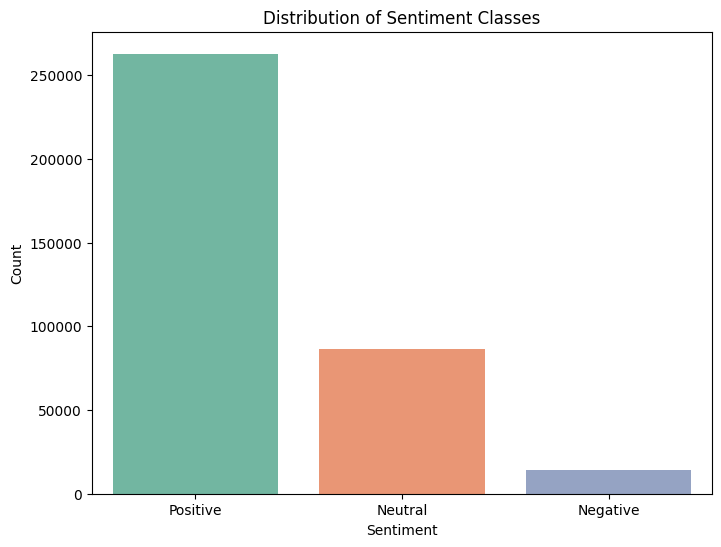

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_withpola, palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')
plt.show()

Using the polarity, negative sentiments with positive labels and viceversa can be checked to flag inconsistencies.


In [12]:
negative_sentiments = df_withpola[(df_withpola['Labels'] == 1) & (df_withpola['Sentiment'] == 'Negative')]
negative_sentiments.shape[0] / df_withpola.shape[0]

0.016383395081408517

In [13]:
positive_sentiments = df_withpola[(df_withpola['Labels'] == 0) & (df_withpola['Sentiment'] == 'Positive')]
positive_sentiments.shape[0] / df_withpola.shape[0]

0.06156484647266411

### Here we have individiated potential mismatches in the data : 
- 1.6% data samples have a positive score but the sentiment analysis model detected a negative sentiment
- 6.1% data samples have a negative score but the sentiment analysis model detected a positive sentiment